## Final Project Submission

Please fill out:
* Student name: **PHINIDY GEORGE**
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: **ASHA DEEN**
* Blog post URL:


**0. Library importation**

In [165]:
from crash_data_utils import summary

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import calendar

# Define the path to your dataset
file_path = r'C:\Users\user\Data_Science_Course\chicago_2019_2022.csv'

# Load the dataset with low_memory=False
df = pd.read_csv(file_path, low_memory=False)

import matplotlib.pyplot as plt
# Set Matplotlib parameters
plt.rcParams['figure.figsize'] = (10, 6)  # Set the default figure size
plt.rcParams['axes.labelsize'] = 14  # Set the font size for axis labels
plt.rcParams['xtick.labelsize'] = 12  # Set the font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # Set the font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 12  # Set the font size for legend
plt.rcParams['axes.formatter.useoffset'] = False

import folium
from folium.plugins import HeatMap
import folium
from folium.plugins import MarkerCluster


In [177]:
#This class reviews my dataset
class DataReview:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path, low_memory=False)

    def display_head(self):
        display(self.df.head())
        
    def display_shape(self):
        display(self.df.shape)
        
    def display_info(self):
        display(self.df.info())
        
    def plot_data_types(self):
        column_types = self.df.dtypes.value_counts().reset_index()
        column_types.columns = ['Data Type', 'Count']
        column_types['Data Type'] = column_types['Data Type'].astype(str)
        total_count = column_types['Count'].sum()
        
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x='Data Type', y='Count', data=column_types)
        plt.xlabel('Data Types')
        plt.ylabel('Count')
        plt.title('Count of Columns by Data Type')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height/total_count*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=12, color='black')
        
        plt.show()
        
    def display_missing_info(self):
        total_rows = len(self.df)
        missing_data = self.df.isnull().sum()
        missing_percentage = (missing_data / total_rows) * 100
        
        missing_info = pd.DataFrame({
            'Column Name': missing_data.index,
            'Missing Values': missing_data.values,
            'Missing Percentage (%)': missing_percentage.values
        })
        
        missing_info = missing_info.sort_values(by='Missing Percentage (%)', ascending=False)
        missing_info.to_excel('missing_values_for_dataframe.xlsx', index=False)
        display(missing_info)
        
    def display_summary_statistics(self):
        summary_stats = self.df.describe(include='all', datetime_is_numeric=True).T.iloc[:20]
        display(summary_stats)

    def display_column_names(self):
        column_names = self.df.columns.tolist()
        print(column_names)
        display(column_names)

    def display_unique_counts(self):
        print('Unique country count:', self.df['country'].nunique())
        print('Unique city count:', self.df['city'].nunique())
        print('Unique state count:', self.df['state'].nunique())
    
    def process_and_display_df_1(self):
        total_first = len(self.df.columns.tolist())
        print('Total columns:', total_first, '\n')
        print(self.df.columns.tolist())

        print('Unique country count:', self.df['country'].nunique())
        print('Unique city count:', self.df['city'].nunique())
        print('Unique state count:', self.df['state'].nunique())
        
        df_1 = self.df[self.df['state'] == 'illinois'].copy()
        df_1 = df_1.drop(columns=['country', 'city', 'state', 'id', 'windgust', 'winddir', 
                                  'moonphase', 'sunset', 'sunrise', 'lattitude', 'longitude', 
                                  'days_tempmin', 'pressure', 'precip_type', 'days_tempmin', 
                                  'days_tempmax', 'days_temp', 'days_feelslikemin', 
                                  'days_feelslikemax', 'days_feelslike', 'days_dew', 
                                  'days_humidity', 'days_precip', 'days_precipprob', 
                                  'days_precipcover', 'days_preciptype', 'days_snow', 
                                  'days_snowdepth', 'days_windgust', 'days_windspeed', 
                                  'days_winddir', 'days_pressure', 'days_cloudcover', 
                                  'days_visibility', 'days_uvindex', 'days_conditions', 
                                  'days_moonphase', 'feelslike', 'injury_non_incapacitated', 
                                  'snow', 'dew', 'precipprob'])

        column_names = df_1.columns.tolist()
        print('Total columns:', len(column_names), 'out of', total_first, '\n')
        display(df_1.head())

# Usage
file_path = r'C:\Users\user\Data_Science_Course\chicago_2019_2022.csv'
data_review = DataReview(file_path)




# Make a copy of df_1 and call it df_2
data_review.process_and_display_df_1()
df_2 = data_review.df[data_review.df['state'] == 'illinois'].copy()
df_2 = df_2.drop(columns=['country', 'city', 'state', 'id', 'windgust', 'winddir', 
                           #'moonphase', 'sunset', 'sunrise', 'lattitude', 'longitude', 
                           'days_tempmin', 'pressure', 'precip_type', 'days_tempmin', 
                           'days_tempmax', 'days_temp', 'days_feelslikemin', 
                           'days_feelslikemax', 'days_feelslike', 'days_dew', 
                           'days_humidity', 'days_precip', 'days_precipprob', 
                           'days_precipcover', 'days_preciptype', 'days_snow', 
                           'days_snowdepth', 'days_windgust', 'days_windspeed', 
                           'days_winddir', 'days_pressure', 'days_cloudcover', 
                           'days_visibility', 'days_uvindex', 'days_conditions', 
                           'days_moonphase', 'feelslike', 'injury_non_incapacitated', 
                           'snow', 'dew', 'precipprob'])



Total columns: 65 

['id', 'crash_date', 'crash_time', 'town', 'city', 'state', 'country', 'total_injured', 'total_killed', 'injury_incapacitated', 'injury_non_incapacitated', 'most_severe_injury', 'crash_type', 'contributory_cause', 'sec_contributory_cause', 'num_vehicles_in_crash', 'crash_hit_and_run', 'crash_severity', 'traffic_control_device', 'traffic_control_device_condition', 'road_defect', 'lattitude', 'longitude', 'days_tempmax', 'days_tempmin', 'days_temp', 'days_feelslikemax', 'days_feelslikemin', 'days_feelslike', 'days_dew', 'days_humidity', 'days_precip', 'days_precipprob', 'days_precipcover', 'days_preciptype', 'days_snow', 'days_snowdepth', 'days_windgust', 'days_windspeed', 'days_winddir', 'days_pressure', 'days_cloudcover', 'days_visibility', 'days_uvindex', 'days_conditions', 'days_moonphase', 'temp', 'feelslike', 'humidity', 'dew', 'precip', 'precipprob', 'snow', 'snowdepth', 'precip_type', 'windgust', 'windspeed', 'winddir', 'pressure', 'visibility', 'cloudcover', 

crash_date crash_time             town total_injured total_killed  \
0   07/18/19      10:35  harwood heights             0            0   
1   07/21/19      13:45        englewood             0            0   
2   07/21/19      16:00           cragin             0            0   
3   07/21/19      16:45           cragin             0            0   
4   07/21/19      23:05           cicero             0            0   

  injury_incapacitated       most_severe_injury                crash_type  \
0                    0  no indication of injury                  rear end   
1                    0  no indication of injury                  rear end   
2                    0  no indication of injury  sideswipe same direction   
3                    0  no indication of injury                   turning   
4                    0  no indication of injury                   turning   

            contributory_cause      sec_contributory_cause  ...  \
0                      weather         unable to determine  ...   
1          unable to determine              not applicable  ...   
2  improper overtaking/passing  improper turning/no signal  ...   
3          unable to determine              not applicable  ...   
4          unable to determine              not applicable  ...   

   traffic_control_device_condition road_defect  temp humidity precip  \
0                       no controls  no defects  72.6     92.9  0.354   
1                       no controls     unknown  72.3     95.0  0.199   
2              functioning properly  no defects  74.6     71.6  0.029   
3              functioning properly  no defects  74.5     72.2  0.030   
4              functioning properly     unknown  66.5     59.4  0.000   

  snowdepth  windspeed  visibility  cloudcover              conditions  
0         0        6.9         1.8        54.6  Rain, Partially cloudy  
1         0       11.4         7.4        87.4  Rain, Partially cloudy  
2         0       13.7         9.9        58.2  Rain, Partially cloudy  
3         0       13.7         9.9        58.3  Rain, Partially cloudy  
4         0        4.9         9.9         0.0                   Clear  

[5 rows x 24 columns]

In [161]:
#this class does the data cleaning and quality of my dataset
class DataQualityChecker:
    def __init__(self, df):
        """
        Initialize the DataQualityChecker with a DataFrame.
        """
        self.df = df

    def check_data_types(self):
        """
        Print the data types of each column in the DataFrame.
        """
        print(self.df.dtypes)

    def check_missing_values(self):
        """
        Check and print the number of missing values for each column in the DataFrame.
        """
        df_2 = self.df.copy()  # Create a copy of the DataFrame to avoid modifying the original
        missing_values_count = df_2.isnull().sum()  # Count missing values
        # Print missing values count without truncating the output
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            print(missing_values_count)

    def check_occurrences_of_N(self):
        """
        Check and print the number of occurrences of the string '\\N' in each column.
        """
        df_2 = self.df.copy()  # Create a copy of the DataFrame to avoid modifying the original
        count_occurrences = df_2.apply(lambda x: (x == '\\N').sum())  # Count occurrences of '\\N'
        # Print count of '\\N' occurrences without truncating the output
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            print(count_occurrences)

    def replace_missing_values(self):
        """
        Replace occurrences of '\\N' with appropriate default values in specific columns.
        """
        df_2 = self.df.copy()  # Create a copy of the DataFrame to avoid modifying the original
        # Replace '\\N' with default values in specified columns
        df_2['total_injured'] = df_2['total_injured'].replace('\\N', '-1')
        df_2['injury_incapacitated'] = df_2['total_killed'].replace('\\N', '-1')
        df_2['total_killed'] = df_2['total_killed'].replace('\\N', '-1')
        df_2['most_severe_injury'] = df_2['most_severe_injury'].replace('\\N', 'unknown')
        df_2['crash_hit_and_run'] = df_2['crash_hit_and_run'].replace('\\N', 'unknown')
        self.df = df_2  # Update the main DataFrame with the changes

    def print_unique_values(self):
        """
        Print the unique values in the 'crash_hit_and_run', 'total_injured', 'total_killed', and 'most_severe_injury' columns.
        """
        df_2 = self.df.copy()  # Create a copy of the DataFrame to avoid modifying the original
        # Print unique values for specified columns
        print(df_2['crash_hit_and_run'].unique())
        print(df_2['total_injured'].unique())
        print(df_2['total_killed'].unique())
        print(df_2['most_severe_injury'].unique())

    def replace_crash_hit_and_run_values(self):
        """
        Replace 'Y' and 'y' with 'yes' and 'N' and 'n' with 'no' in the 'crash_hit_and_run' column.
        """
        df_2 = self.df.copy()  # Create a copy of the DataFrame to avoid modifying the original
        # Replace 'Y', 'y' with 'yes' and 'N', 'n' with 'no'
        df_2['crash_hit_and_run'] = df_2['crash_hit_and_run'].replace({'Y': 'yes', 'y': 'yes', 'N': 'no', 'n': 'no'})
        print(df_2['crash_hit_and_run'].unique())  # Print unique values after replacement
        self.df = df_2  # Update the main DataFrame with the changes

    def convert_data_types(self):
        """
        Convert the data types of specific columns to appropriate types.
        """
        df_3 = self.df.copy()  # Create a copy of the DataFrame to avoid modifying the original
        # Convert columns to appropriate data types
        df_3['total_injured'] = pd.to_numeric(df_3['total_injured'], errors='coerce')
        df_3['total_killed'] = pd.to_numeric(df_3['total_killed'], errors='coerce')
        df_3['injury_incapacitated'] = pd.to_numeric(df_3['injury_incapacitated'], errors='coerce')
        df_3['crash_hit_and_run'] = df_3['crash_hit_and_run'].astype('category')
        df_3['crash_severity'] = df_3['crash_severity'].astype('category')
        df_3['snowdepth'] = pd.to_numeric(df_3['snowdepth'], errors='coerce')
        df_3['conditions'] = df_3['conditions'].astype('category')
        print(df_3.dtypes)  # Print the data types of the columns after conversion
        return df_3

    def save_to_csv(self, file_path):
        """
        Save the DataFrame to a CSV file at the specified file path.
        """
        self.df.to_csv(file_path, index=False)  # Save the DataFrame to a CSV file without the index

    def column_info_analysis(self):
        """
        Analyze and print information about each column in the DataFrame.
        """
        data = self.df.copy()
        column_info = []
        for column in data.columns:
            unique_values = data[column].unique()
            num_unique_values = len(unique_values)
            data_type = data[column].dtype
            column_info.append([column, data_type, num_unique_values, unique_values])
        column_table = pd.DataFrame(column_info, columns=['Column Name', 'Data Type', 'Number of Unique Values', 'Unique Values'])
        print(column_table)

    def describe_data(self):
        """
        Print the shape and descriptive statistics of the DataFrame.
        """
        data = self.df.copy()
        print(data.shape)
        print(data.describe())

    def visualize_correlation(self):
        """
        Visualize the correlation matrix of numerical columns in the DataFrame.
        """
        data = self.df.copy()
        numerical_columns = data.select_dtypes(include=['float64', 'int64'])
        correlation_matrix = numerical_columns.corr()
        
        # Ensure seaborn is properly imported and used for plotting
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Matrix of Numerical Data')
        plt.show()

checker = DataQualityChecker(df_2)


In [178]:
#this class does the visualisations and EDA
class VisualizationEDA:
    def __init__(self, df):
        self.df = df
    
    def create_map(self, df_subset_size=140000):
        df_subset = self.df.head(df_subset_size)
        map_center = [df_subset['lattitude'].mean(), df_subset['longitude'].mean()]
        mymap = folium.Map(location=map_center, zoom_start=12)
        marker_cluster = MarkerCluster().add_to(mymap)
        
        for index, row in df_subset.iterrows():
            folium.Marker([row['lattitude'], row['longitude']]).add_to(marker_cluster)
        
        return mymap
    
    def scatter_plots(self, data):
        fig, axs = plt.subplots(1, 2, figsize=(18, 6))

        colors = {'minor': 'black', 'major': 'lightblue'}

        # Plot for Total Killed
        scatter1 = axs[0].scatter(data.index, data['total_killed'], c=data['crash_severity'].map(colors), alpha=0.5, label='Crash Severity')
        axs[0].set_title('Scatter Plot of Total Killed with Severity Hue')
        axs[0].set_xlabel('Crash Index')
        axs[0].set_ylabel('Total Killed')

        # Plot for Total Injured
        scatter2 = axs[1].scatter(data.index, data['total_injured'], c=data['crash_severity'].map(colors), alpha=0.5, label='Crash Severity')
        axs[1].set_title('Scatter Plot of Total Injured with Severity Hue')
        axs[1].set_xlabel('Crash Index')
        axs[1].set_ylabel('Total Injured')

        legend_labels = list(colors.keys())
        legend_values = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors[label], markersize=10) for label in legend_labels]
        fig.legend(handles=legend_values, labels=legend_labels, loc='upper right')

        plt.show()

    def calculate_crash_severity(self, data):
        incapacitating_mask = data['most_severe_injury'].str.contains('incapacitating injury', case=False, na=False)
        incapacitating_mask_2 = data['most_severe_injury'].str.contains('fatal', case=False, na=False)

        # Create 'crash_severity_2' column
        data['crash_severity_2'] = 'minor'  # Default to 'minor'
        data.loc[(data['total_killed'] > 0) | (data['total_injured'] > 6) | incapacitating_mask | incapacitating_mask_2, 'crash_severity_2'] = 'major'
        data.loc[(data['total_killed'] == -1) & (data['total_injured'] == -1) & ~incapacitating_mask_2 & ~incapacitating_mask, 'crash_severity_2'] = 'unknown'

        # Display unique values and counts of the 'crash_severity_2' column
        print(data['crash_severity_2'].value_counts())

        return data.head()
    
    def scatter_plots_with_severity(self, temp_data):
        fig, axs = plt.subplots(1, 2, figsize=(22, 6))

        colors = {'minor': '#02fb00', 'major': '#ff95ac', 'unknown': '#c4c4c4'}

        # Plot for Total Killed
        axs[0].scatter(temp_data.index, temp_data['total_killed'], c=temp_data['crash_severity_2'].map(colors), alpha=0.5)
        axs[0].set_title('Scatter Plot of Total Killed with Severity Hue')
        axs[0].set_xlabel('Crash Index')
        axs[0].set_ylabel('Total Killed')

        # Plot for Total Injured
        axs[1].scatter(temp_data.index, temp_data['total_injured'], c=temp_data['crash_severity_2'].map(colors), alpha=0.5)
        axs[1].set_title('Scatter Plot of Total Injured with Severity Hue')
        axs[1].set_xlabel('Crash Index')
        axs[1].set_ylabel('Total Injured')

        legend_labels = list(colors.keys())
        legend_values = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors[label], markersize=10) for label in legend_labels]
        fig.legend(handles=legend_values, labels=legend_labels, loc='upper right')

        plt.show()
    
    def scatter_plots_with_severity_v2(self, temp_data):
        fig, axs = plt.subplots(1, 2, figsize=(22, 6))

        colors = {'minor': '#02fb00', 'major': '#ff95ac', 'unknown': '#c4c4c4'}

        # Plot for Total Killed
        axs[0].scatter(temp_data.index, temp_data['total_killed'], c=temp_data['crash_severity_2'].map(colors), alpha=0.5)
        axs[0].set_title('Scatter Plot of Total Killed with Severity Hue')
        axs[0].set_xlabel('Crash Index')
        axs[0].set_ylabel('Total Killed')

        # Plot for Total Injured
        axs[1].scatter(temp_data.index, temp_data['total_injured'], c=temp_data['crash_severity_2'].map(colors), alpha=0.5)
        axs[1].set_title('Scatter Plot of Total Injured with Severity Hue')
        axs[1].set_xlabel('Crash Index')
        axs[1].set_ylabel('Total Injured')

        legend_labels = list(colors.keys())
        legend_values = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors[label], markersize=10) for label in legend_labels]
        fig.legend(handles=legend_values, labels=legend_labels, loc='upper right')

        plt.show()
eda = VisualizationEDA(df)
df_3 = df_2.copy()
data =  df_3.copy()
temp_data = data.copy()


In [170]:
# Ensure 'total_killed' and 'total_injured' are numeric
temp_data['total_killed'] = pd.to_numeric(temp_data['total_killed'], errors='coerce')
temp_data['total_injured'] = pd.to_numeric(temp_data['total_injured'], errors='coerce')

# Replace NaNs with a placeholder value (e.g., -1) if needed
temp_data['total_killed'].fillna(-1, inplace=True)
temp_data['total_injured'].fillna(-1, inplace=True)

# Create masks for 'incapacitating injury' and 'fatal'
incapacitating_mask = temp_data['most_severe_injury'].str.contains('incapacitating injury', case=False, na=False)
incapacitating_mask_2 = temp_data['most_severe_injury'].str.contains('fatal', case=False, na=False)

# Create 'crash_severity_2' column
temp_data['crash_severity_2'] =  
temp_data.loc[(temp_data['total_killed'] > 0) | (temp_data['total_injured'] > 6) | incapacitating_mask | incapacitating_mask_2, 'crash_severity_2'] = 'major'
temp_data.loc[(temp_data['total_killed'] == -1) & (temp_data['total_injured'] == -1) & ~incapacitating_mask_2 & ~incapacitating_mask, 'crash_severity_2'] = 'unknown'
# Display unique values and counts of the 'crash_severity_2' column
print(temp_data['crash_severity_2'].value_counts())

minor      332355
major       38769
unknown       873
Name: crash_severity_2, dtype: int64


In [179]:
#This class does the ploting for the visuals
class TimeSeriesAnalysis:
    def __init__(self, temp_data):
        self.temp_data = temp_data
        self.temp_data['crash_time'] = pd.to_datetime(self.temp_data['crash_time'], format='%H:%M', errors='coerce')
        self.temp_data['crash_date'] = pd.to_datetime(self.temp_data['crash_date'], format='%m/%d/%y')
        self.temp_data['crash_day'] = self.temp_data['crash_date'].dt.day_name()
    
    def plot_crash_time_distribution(self):
        plt.figure(figsize=(10, 6))
        plt.hist(self.temp_data['crash_time'].dt.hour, bins=24, edgecolor='black', alpha=0.7)
        plt.title('Distribution of Crashes During Different Parts of the Day')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Number of Crashes')
        plt.xticks(range(24), [f'{hour:02}:00' for hour in range(24)], rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    def plot_total_killed_and_injured_by_hour(self):
        fd = self.temp_data[(self.temp_data['total_killed'] >= 0) & (self.temp_data['total_injured'] >= 0)]
        hourly_data = fd.groupby(fd['crash_time'].dt.hour)[['total_killed', 'total_injured']].sum()

        plt.figure(figsize=(12, 5))

        # Plot for total killed
        plt.subplot(1, 2, 1)
        hourly_data['total_killed'].plot(kind='bar', color='lightsalmon')
        plt.title('Total Killed by Hour')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Count')

        # Plot for total injured
        plt.subplot(1, 2, 2)
        hourly_data['total_injured'].plot(kind='bar', color='lightsteelblue')
        plt.title('Total Injured by Hour')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Count')

        plt.tight_layout()
        plt.show()

    def plot_crashes_by_day_of_week(self):
        crash_day_counts = self.temp_data['crash_day'].value_counts()
        sorted_days = list(calendar.day_name)

        plt.figure(figsize=(10, 6))
        crash_day_counts.loc[sorted_days].plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Number of Crashes by Day of the Week')
        plt.xlabel('Day of the Week')
        plt.ylabel('Number of Crashes')
        plt.show()

    def plot_fatal_incapacitating_injuries_by_weekday(self):
        fatal_incapacitating_counts = self.temp_data['most_severe_injury'].isin(['fatal', 'incapacitating injury']).groupby(self.temp_data['crash_day']).sum()
        fatal_incapacitating_table = pd.DataFrame({'Weekday': fatal_incapacitating_counts.index, 'Total Fatal/Incapacitating': fatal_incapacitating_counts.values})

        weekday_order = list(calendar.day_name)
        fatal_incapacitating_table['Weekday'] = pd.Categorical(fatal_incapacitating_table['Weekday'], categories=weekday_order, ordered=True)
        fatal_incapacitating_table = fatal_incapacitating_table.sort_values('Weekday')

        plt.figure(figsize=(10, 6))
        plt.bar(fatal_incapacitating_table['Weekday'], fatal_incapacitating_table['Total Fatal/Incapacitating'], color='#F9ABAB')
        plt.title('Fatal and Incapacitating Injuries by Weekday')
        plt.xlabel('Weekday')
        plt.ylabel('Total Fatal/Incapacitating Injuries')
        plt.show()



ts_analysis = TimeSeriesAnalysis(temp_data)

df_3 = df_2.copy()
data =  df_3.copy()
temp_data = data.copy()

In [173]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371997 entries, 0 to 372061
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   crash_date                        371997 non-null  object 
 1   crash_time                        371997 non-null  object 
 2   town                              371997 non-null  object 
 3   total_injured                     371997 non-null  object 
 4   total_killed                      371997 non-null  object 
 5   injury_incapacitated              371997 non-null  object 
 6   most_severe_injury                371997 non-null  object 
 7   crash_type                        371997 non-null  object 
 8   contributory_cause                371997 non-null  object 
 9   sec_contributory_cause            371997 non-null  object 
 10  num_vehicles_in_crash             371997 non-null  int64  
 11  crash_hit_and_run                 371997 non-null  o

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class CrashAnalysis:
    def __init__(self, temp_data):
        """
        Initialize the CrashAnalysis class with a DataFrame containing crash data.

        Parameters:
        temp_data (pd.DataFrame): The DataFrame containing the crash data.
        """
        self.temp_data = temp_data
    
    def plot_top_contributory_causes(self):
        """
        Plot the top 15 contributory causes of crashes, excluding 'unable to determine' and 'not applicable'.
        """
        # Filter out rows where the contributory cause is 'unable to determine' or 'not applicable'
        filtered_contributory_causes = self.temp_data[~self.temp_data['contributory_cause'].isin(['unable to determine', 'not applicable'])]
        
        # Get the top 15 contributory causes
        top_contributory_causes = filtered_contributory_causes['contributory_cause'].value_counts().head(15)

        # Plot the top 15 contributory causes
        plt.figure(figsize=(12, 6))
        top_contributory_causes.plot(kind='bar', color='blue', alpha=0.7)
        plt.title('Top 15 Contributory Causes of Crashes')
        plt.xlabel('Contributory Cause')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    def plot_top_towns(self):
        """
        Plot the top 15 towns with the highest crash frequency.
        """
        # Get the top 15 towns with the highest crash frequency
        top_towns = self.temp_data['town'].value_counts().head(15)

        # Plot the top 15 towns
        plt.figure(figsize=(12, 6))
        bar_plot = sns.barplot(x=top_towns.index, y=top_towns.values)
        plt.title('Top 15 Areas with the Highest Crash Frequency')
        plt.xlabel('Town')
        plt.ylabel('Number of Crashes')
        plt.xticks(rotation=45, ha='right')
        plt.show()

    def plot_weather_conditions_distribution(self):
        """
        Plot the distribution of weather conditions in weather-related crashes.
        """
        # Filter the data for weather-related crashes
        weather_data = self.temp_data[self.temp_data['contributory_cause'] == 'weather']
        
        # Get the counts of different weather conditions
        weather_conditions = weather_data['conditions'].value_counts()

        # Plot the distribution of weather conditions in weather-related crashes
        plt.figure(figsize=(10, 6))
        weather_conditions.plot(kind='bar', color='skyblue')
        plt.title('Distribution of Weather Conditions in Weather-Related Crashes')
        plt.xlabel('Weather Conditions')
        plt.ylabel('Number of Crashes')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    def plot_crash_severity_by_conditions(self):
        """
        Plot the distribution of crashes across different conditions by severity.
        """
        # Check if 'crash_severity_2' column exists
        if 'crash_severity_2' not in self.temp_data.columns:
            print("Error: 'crash_severity_2' column not found in the dataset.")
            return

        # Plot the count of crashes for each condition, separated by severity
        plt.figure(figsize=(14, 8))
        sns.countplot(x='conditions', hue='crash_severity_2', data=self.temp_data, 
                      order=self.temp_data['conditions'].value_counts().index, palette='viridis')
        plt.title('Distribution of Crashes Across Conditions by Severity')
        plt.xlabel('Conditions')
        plt.ylabel('Number of Crashes')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Crash Severity', loc='upper right')
        plt.show()

    def plot_weather_conditions_vs_crashes(self):
        """
        Plot histograms of weather conditions (humidity, windspeed, visibility, cloudcover) against total crashes,
        and plot distributions of snow depth and precipitation with corresponding crash counts.
        """
        # Define weather-related columns and their Georgian equivalents
        weather_columns = ['humidity', 'windspeed', 'visibility', 'cloudcover']
        weather_columns_geo = ['Sylfaen', 'Sylfaen', 'Sylfaen', 'Sylfaen']

        num_bins = 20

        # Plot weather conditions histograms
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
        fig.suptitle('Weather Conditions vs Total Crashes', fontsize=16)

        axes = axes.flatten()

        for i, column in enumerate(weather_columns):
            filtered_data = self.temp_data[self.temp_data[column].notnull()]

            sns.histplot(x=column, data=filtered_data, bins=num_bins, kde=True, ax=axes[i], color='skyblue')
            axes[i].set_title(f'{column.capitalize()} Distribution' + " (" + weather_columns_geo[i] + ")")
            axes[i].set_xlabel(column.capitalize())
            axes[i].set_ylabel('Total Crashes')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

        # Plot distributions of snow depth and precipitation with corresponding crash counts
        snowdepth_counts = self.temp_data['snowdepth'].value_counts().sort_index()
        precip_counts = self.temp_data['precip'].value_counts().sort_index()

        snowy_data = self.temp_data[self.temp_data['snowdepth'] > 0]
        precip_data = self.temp_data[self.temp_data['precip'] > 0]

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

        axes[0].hist(snowy_data['snowdepth'], bins=30, color='skyblue', edgecolor='black')
        axes[0].set_title('Distribution of Snow Depth (Sylfaen) and Corresponding Crash Counts (>0)')
        axes[0].set_xlabel('Snow Depth')
        axes[0].set_ylabel('Crash Counts')
        axes[0].grid(axis='y', linestyle='--', alpha=0.7)

        axes[1].hist(precip_data['precip'], bins=30, color='lightgreen', edgecolor='black')
        axes[1].set_title('Distribution of Precipitation (Sylfaen) and Corresponding Crash Counts (>0)')
        axes[1].set_xlabel('Precipitation')
        axes[1].set_ylabel('Crash Counts')
        axes[1].grid(axis='y', linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()


# Initialize the CrashAnalysis class with the crash data
crash_analysis = CrashAnalysis(temp_data)

# Plot crash severity by conditions
crash_analysis.plot_crash_severity_by_conditions()


Error: 'crash_severity_2' column not found in the dataset.


In [111]:
#This class does EDA and visuals
class CrashSeasonAnalysis:
    def __init__(self, temp_data):
        self.temp_data = temp_data

    def plot_crash_count_by_month_and_year(self):
        self.temp_data['crash_date'] = pd.to_datetime(self.temp_data['crash_date'])
        self.temp_data['year'] = self.temp_data['crash_date'].dt.year
        self.temp_data['month'] = self.temp_data['crash_date'].dt.month_name()

        filtered_data = self.temp_data[self.temp_data['year'] != 2018]

        month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

        crash_count_table = filtered_data.groupby(['year', 'month']).size().reset_index(name='crash_count')
        crash_count_table['month'] = pd.Categorical(crash_count_table['month'], categories=month_order, ordered=True)

        pivot_data = crash_count_table.pivot(index='year', columns='month', values='crash_count').fillna(0)

        plt.figure(figsize=(10, 4))
        sns.heatmap(pivot_data, cmap='magma', annot=True, fmt='g', cbar_kws={'label': 'Crash Count'})
        plt.title('Crash Count by Month and Year')
        plt.xlabel('Month')
        plt.ylabel('Year')
        plt.xticks(rotation=45, ha='right')
        plt.show()
        
        return pivot_data

    def plot_temperature_vs_injuries_and_deaths(self):
        def get_season(month):
            if 3 <= month <= 5:
                return 'Spring'
            elif 6 <= month <= 8:
                return 'Summer'
            elif 9 <= month <= 11:
                return 'Fall'
            else:
                return 'Winter'

        self.temp_data['season'] = self.temp_data['crash_date'].dt.month.apply(get_season)

        season_colors = {'Winter': '#4D95C4', 'Spring': '#E793EC', 'Summer': '#76E683', 'Fall': '#E7BF57'}

        self.temp_data['temp_cels'] = (self.temp_data['temp'] - 32) * 5 / 9

        filtered_data_injured = self.temp_data[self.temp_data['total_injured'] >= 0]

        plt.figure(figsize=(16, 6))

        plt.subplot(1, 2, 1)
        sns.scatterplot(x='temp_cels', y='total_injured', data=filtered_data_injured, alpha=0.5, palette=season_colors, hue='season', legend='full')
        plt.title('Scatter Plot of Temperature (°C) vs Total Injured')
        plt.xlabel('Temperature')
        plt.ylabel('Total Injured')

        filtered_data_killed = self.temp_data[self.temp_data['total_killed'] >= 0]

        plt.subplot(1, 2, 2)
        sns.scatterplot(x='temp_cels', y='total_killed', data=filtered_data_killed, alpha=0.5, palette=season_colors, hue='season', legend='full')
        plt.title('Scatter Plot of Temperature (°C) vs Total Killed')
        plt.xlabel('Temperature')
        plt.ylabel('Total Killed')

        plt.tight_layout()
        plt.show()

    def plot_most_fatal_crash_types(self):
        crash_type_summary = self.temp_data[self.temp_data['total_killed'] >= 0].groupby('crash_type')['total_killed'].sum().reset_index()
        crash_type_summary.columns = ['crash_type', 'total_killed']
        crash_type_summary = crash_type_summary.sort_values(by='total_killed', ascending=False)

        sorted_crash_types = crash_type_summary.sort_values(by='total_killed', ascending=False)

        top_n = 8
        selected_crash_types = sorted_crash_types.head(top_n)

        plt.figure(figsize=(8, 8))
        colors = sns.color_palette('Set2', n_colors=top_n)
        plt.pie(selected_crash_types['total_killed'], labels=selected_crash_types['crash_type'], autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title('Most Fatal Crash Types')
        plt.show()
        
        return crash_type_summary

    def get_crash_type_summary(self):
        crash_type_summary = self.temp_data[self.temp_data['total_killed'] >= 0].groupby('crash_type')['total_killed'].sum().reset_index()
        crash_type_summary.columns = ['crash_type', 'total_killed']
        crash_type_summary = crash_type_summary.sort_values(by='total_killed', ascending=False)
        return crash_type_summary

# Initialize the CrashSeasonAnalysis class with the crash data
crash_season_analysis = CrashSeasonAnalysis(temp_data)



In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class CrashCauseAnalysis:
    def __init__(self, temp_data):
        """
        Initialize the CrashCauseAnalysis class with a DataFrame containing crash data.
        
        Parameters:
        temp_data (pd.DataFrame): The DataFrame containing the crash data.
        """
        self.temp_data = temp_data

    def get_contributory_cause_table(self):
        """
        Generate a table summarizing the total killed and total crashes for each contributory cause,
        along with the death ratio.
        
        Returns:
        pd.DataFrame: The contributory cause table sorted by total killed.
        """
        contributory_cause_table = self.temp_data[self.temp_data['total_killed'] >= 0].groupby('contributory_cause').agg({
            'total_killed': 'sum',
            'contributory_cause': 'count'
        }).rename(columns={'contributory_cause': 'total_crashes'}).reset_index()
        
        contributory_cause_table['death_ratio'] = (contributory_cause_table['total_killed'] / contributory_cause_table['total_crashes']) * 100
        contributory_cause_table = contributory_cause_table.sort_values(by='total_killed', ascending=False)
        return contributory_cause_table

    def plot_top_conditions(self):
        """
        Plot the top 6 conditions by total killed and by death ratio.
        """
        contributory_cause_table = self.get_contributory_cause_table()
        
        top_conditions_total_killed = contributory_cause_table.sort_values('total_killed', ascending=False).head(6)
        top_conditions_death_ratio = contributory_cause_table.sort_values('death_ratio', ascending=False).head(6)
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        sns.barplot(x='total_killed', y='contributory_cause', data=top_conditions_total_killed, ax=axes[0], palette='viridis')
        axes[0].set_title('Top 6 Conditions by Total Killed')
        axes[0].set_xlabel('Total Killed')
        axes[0].set_ylabel('Condition')

        sns.barplot(x='death_ratio', y='contributory_cause', data=top_conditions_death_ratio, ax=axes[1], palette='plasma')
        axes[1].set_title('Top 6 Conditions by Death Ratio')
        axes[1].set_xlabel('Death Ratio (%)')
        axes[1].set_ylabel('Condition')

        plt.tight_layout()
        plt.show()

    def plot_avg_vehicles_by_cause(self):
        """
        Plot the average number of vehicles in crashes by contributory cause.
        """
        filtered_data = self.temp_data.sort_values('num_vehicles_in_crash', ascending=False).head(16)
        avg_vehicles_by_cause = filtered_data.groupby('contributory_cause')['num_vehicles_in_crash'].mean().reset_index()
        avg_vehicles_by_cause = avg_vehicles_by_cause.sort_values(by='num_vehicles_in_crash', ascending=False).head(7)

        plt.figure(figsize=(12, 6))
        plt.bar(avg_vehicles_by_cause['contributory_cause'], avg_vehicles_by_cause['num_vehicles_in_crash'], color='skyblue')
        plt.xlabel('Contributory Cause')
        plt.ylabel('Average Number of Vehicles in Crash')
        plt.title('Average Number of Vehicles in Crash by Contributory Cause')
        plt.xticks(rotation=45, ha='right')
        plt.show()

    def get_traffic_control_device_table(self):
        """
        Generate a table summarizing the total killed and total crashes for each traffic control device,
        along with the death ratio.
        
        Returns:
        pd.DataFrame: The traffic control device table sorted by death ratio.
        """
        traffic_control_device_table = self.temp_data[self.temp_data['total_killed'] >= 0].groupby('traffic_control_device').agg({
            'total_killed': 'sum',
            'traffic_control_device': 'count'
        }).rename(columns={'traffic_control_device': 'total_crashes'}).reset_index()

        traffic_control_device_table['death_ratio'] = (traffic_control_device_table['total_killed'] / traffic_control_device_table['total_crashes']) * 100
        traffic_control_device_table_sorted = traffic_control_device_table.sort_values(by='death_ratio', ascending=False)
        return traffic_control_device_table_sorted


# Initialize the CrashCauseAnalysis class with the crash data
crash_cause_analysis = CrashCauseAnalysis(temp_data)



**CHICAGO, IL: CAR CRASH SEVERITY ANALYSIS AND PREDICTIVE MODELLING**

Using Machine Learning to Predict Car Crash Severity

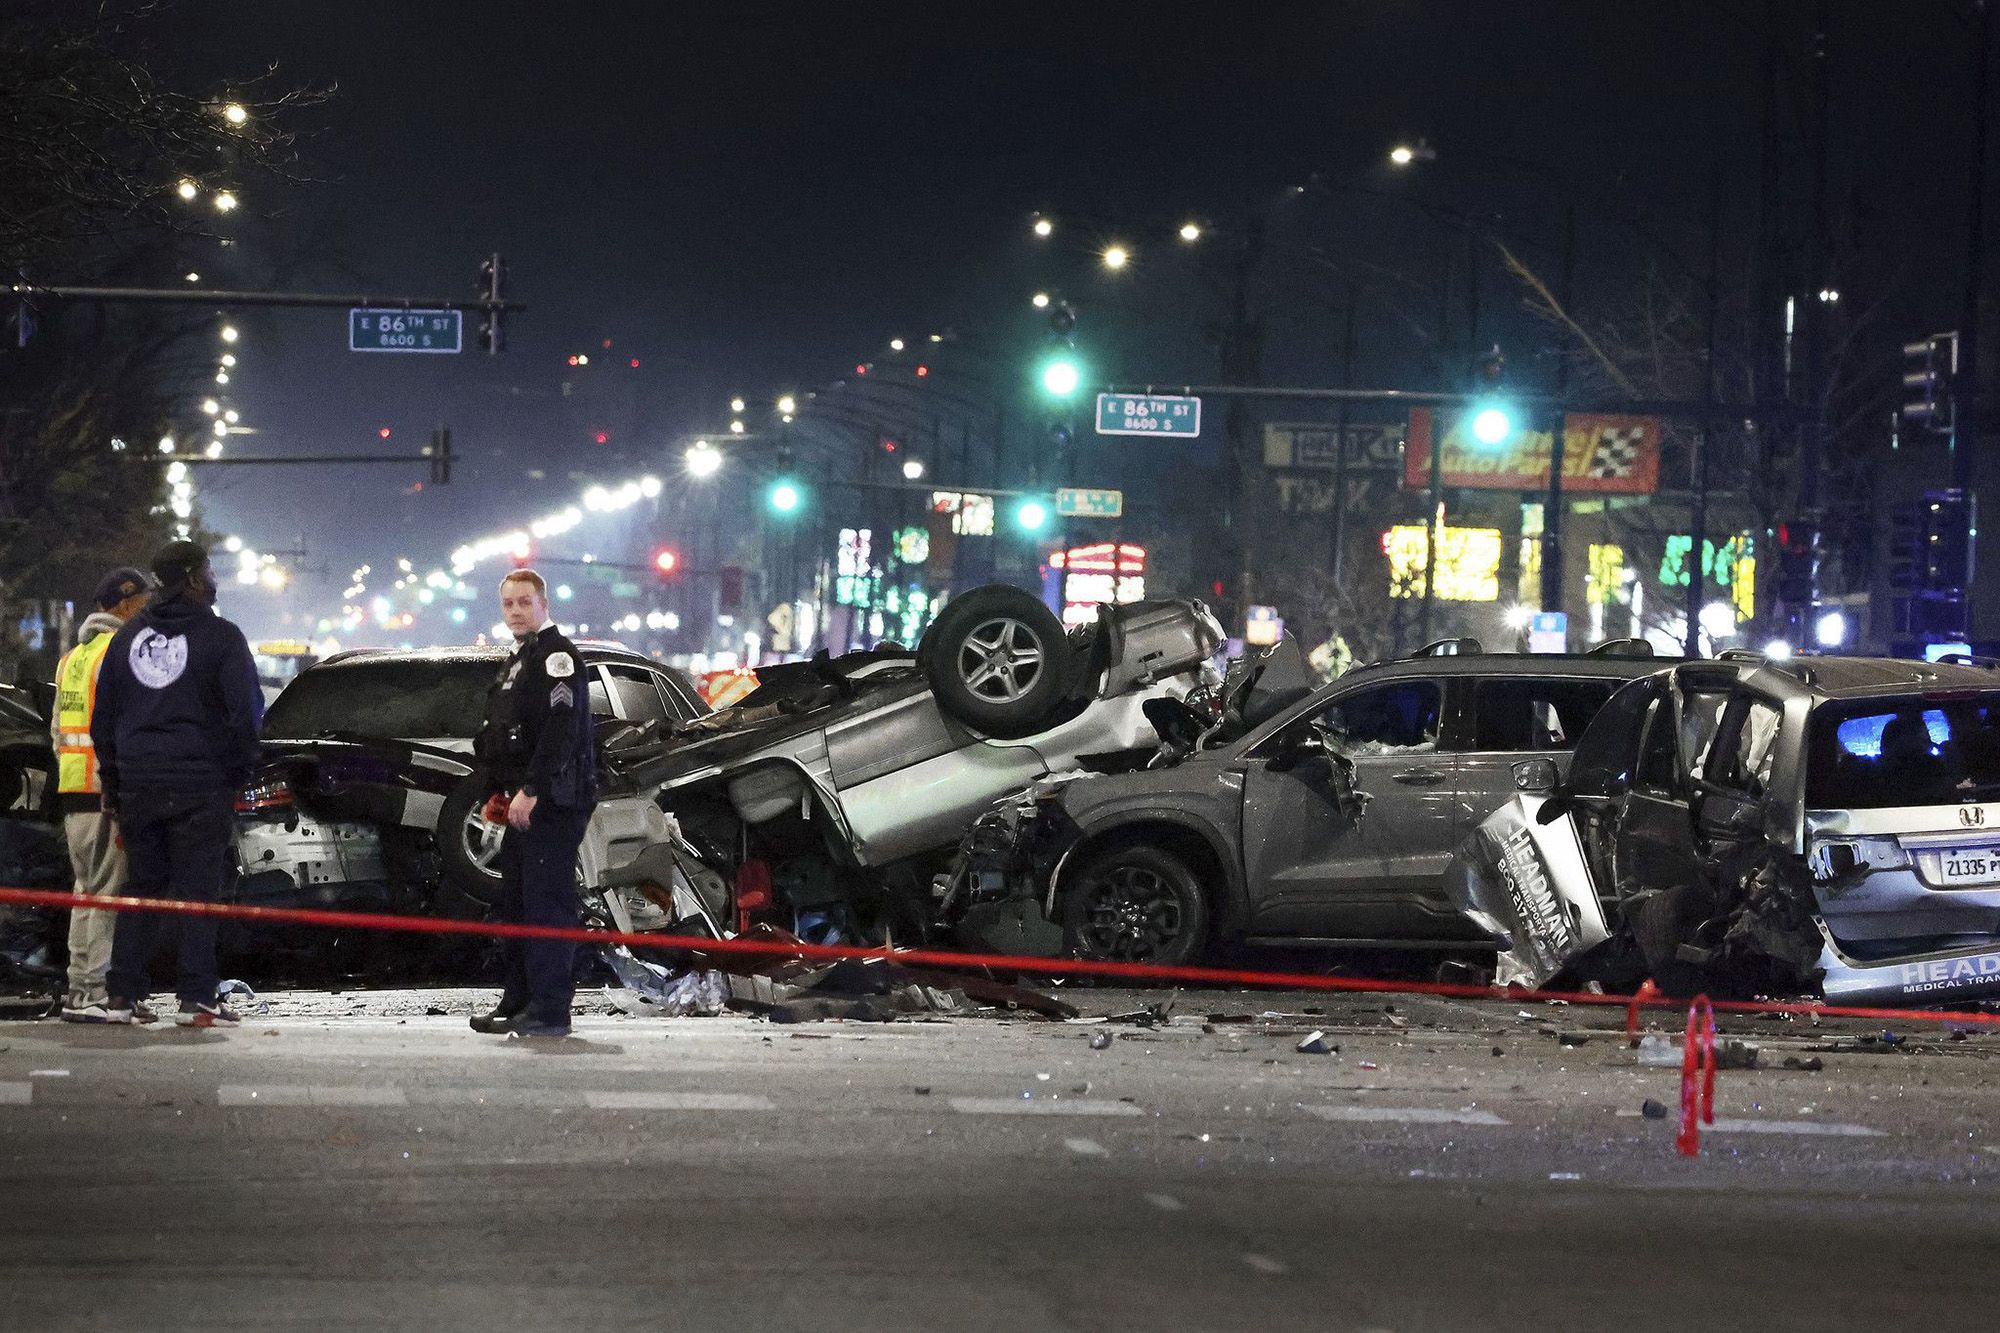

**Stakeholder: Chicago Department of Transportation**


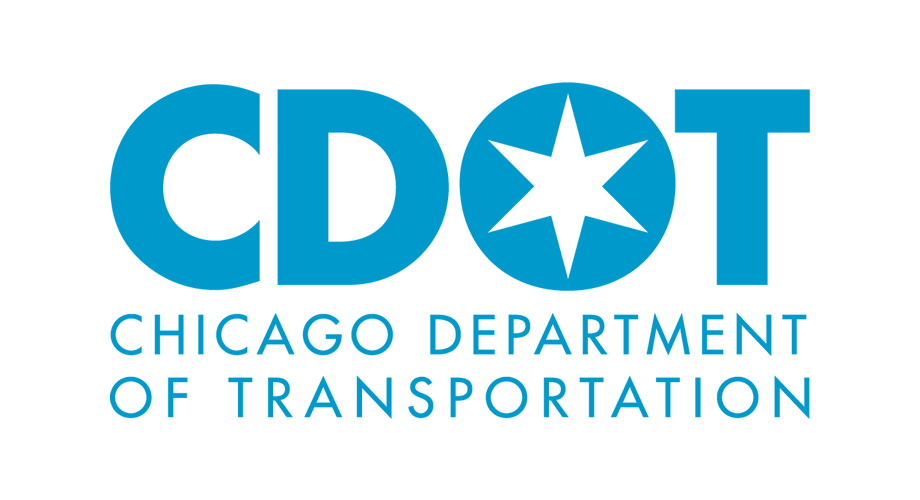

**1.BUSINESS  CASE**

Recently, a report from the National Security Council highlighted some alarming statistics from 2020.The first paragraph stated:

                 For the first time since 2007, preliminary data from the National Safety Council show that as many as 
                 42,060 people are estimated to have died in motor vehicle crashes in 2020.
                 That marks an 8% increase over 2019 in a year where people drove significantly less frequently because 
                 of the pandemic.
                                                                     
According to their data, the US hasn't experienced an increase like this since **1924**.

Following this trend, the **Governor's Highway Safety Association** highlighted that pedestrian fatalities have reached a **30-year high**. Nighttime pedestrian deaths surged by 67%, while daytime fatalities increased by 16%, emphasizing the urgent need for safer road crossings and better visibility for both pedestrians and drivers.

Zooming in on **Illinois**, approximately **1000 people** lost their lives in motor vehicle accidents in **2019** alone.

The **Advocates for Highway and Auto Safety** have evaluated all US states based on their Roadmap for State Highway Safety Laws, which includes 16 laws focused on occupant protection (e.g., seat belt and helmet laws), child protection, and teen driving.
"""

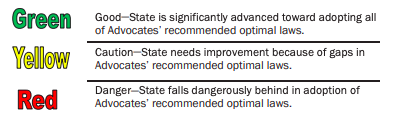

When Illinois is scored against this Roadmap, it has been given a yellow rating (Caution), since it still lacks the following safety laws:

- All-Rider Motorcycle Helmet Law
- Booster Seat Law
- GDL (Graduated Driver's License) – Minimum Age 16 for Learner’s Permit
- GDL – Stronger Nighttime Restriction Provision
- GDL – Stronger Passenger Restriction Provision
- GDL – Age 18 for Unrestricted License                       
                        
In response, the Chicago Department of Transportation is actively working with Vision Zero, an initiative aimed at reducing road accidents. Vision Zero's report and action plan utilize crash data to identify high-risk corridors in the city and guide efforts in education, road safety improvements, and more.

**1.1 PROJECT OBJECTIVE**

Considering these ongoing safety efforts and road safety issues, our analysis and modeling of this data will be guided by the goal of enhancing road safety. Specifically, our focus will be on predicting the severity of crashes based on injury outcomes.

**2.DATA UNDERSTANDING**

**Data: Chicago City Data Portal**


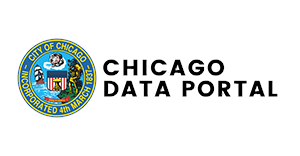

Our Chicago Traffic dataset came from the City of Chicago Data portal.It had:

**Number of Rows: 372,062**

**Number of columns:  65**

In [182]:
summary.head(65)

Column Name                                   Description
0           id      Unique identifier for each crash record.
1   crash_date                            Date of the crash.
2   crash_time                            Time of the crash.
3         town                Town where the crash occurred.
4         city                City where the crash occurred.
..         ...                                           ...
60  cloudcover         Cloud cover at the time of the crash.
61  conditions  Weather conditions at the time of the crash.
62     sunrise      Time of sunrise on the day of the crash.
63      sunset       Time of sunset on the day of the crash.
64   moonphase          Moon phase at the time of the crash.

[65 rows x 2 columns]

 **Overeview Of Dataset Columns**

The dataset's columns provide a comprehensive view of various factors influencing motor vehicle crashes, from temporal and spatial dimensions to environmental and infrastructural conditions. This allows for a multi-faceted analysis, helping identify key risk factors and high-risk areas, which are essential for developing effective safety interventions and policies.

**3.DATA PROCESSING**

**Step 1: Data Review**

- Review the existing crash dataset thoroughly to identify any issues, ambiguities, inconsistencies, or areas for improvement. This involves examining the structure, content, and quality of the data.

In [183]:
data_review.display_shape()

(372062, 65)

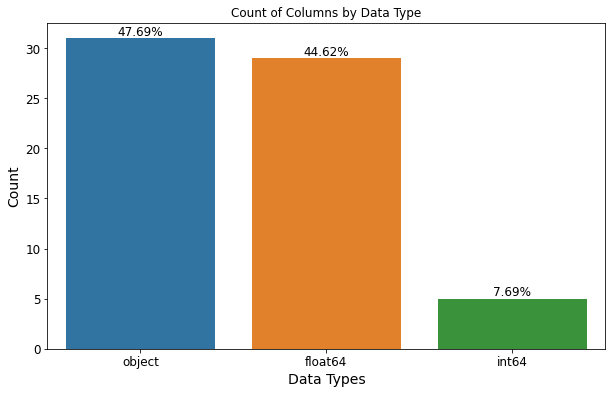

In [184]:
data_review.plot_data_types()

In [185]:
data_review.display_missing_info()

Column Name  Missing Values  Missing Percentage (%)
0                  id               0                     0.0
33   days_precipcover               0                     0.0
35          days_snow               0                     0.0
36     days_snowdepth               0                     0.0
37      days_windgust               0                     0.0
..                ...             ...                     ...
27  days_feelslikemin               0                     0.0
28     days_feelslike               0                     0.0
29           days_dew               0                     0.0
30      days_humidity               0                     0.0
64          moonphase               0                     0.0

[65 rows x 3 columns]

In [186]:
data_review.display_summary_statistics()

count unique                      top  \
id                                372062    NaN                      NaN   
crash_date                        372062   1294                 01/12/19   
crash_time                        372062   1440                    16:00   
town                              372062     71           mccormickville   
city                              372062      1                  chicago   
state                             372062      3                 illinois   
country                           372062      1                      usa   
total_injured                     372062     19                        0   
total_killed                      372062      5                        0   
injury_incapacitated              372062      8                        0   
injury_non_incapacitated          372062     19                        0   
most_severe_injury                372062      6  no indication of injury   
crash_type                        372062     18     parked motor vehicle   
contributory_cause                372062     40      unable to determine   
sec_contributory_cause            372062     40           not applicable   
num_vehicles_in_crash             372062    NaN                      NaN   
crash_hit_and_run                 372062      5                       \N   
crash_severity                    372062      2                    major   
traffic_control_device            372062     19              no controls   
traffic_control_device_condition  372062      8              no controls   

                                    freq         mean       std          min  \
id                                   NaN  2.00442e+08    107406  2.00256e+08   
crash_date                           582          NaN       NaN          NaN   
crash_time                          5303          NaN       NaN          NaN   
town                               54877          NaN       NaN          NaN   
city                              372062          NaN       NaN          NaN   
state                             371997          NaN       NaN          NaN   
country                           372062          NaN       NaN          NaN   
total_injured                     316611          NaN       NaN          NaN   
total_killed                      370728          NaN       NaN          NaN   
injury_incapacitated              364268          NaN       NaN          NaN   
injury_non_incapacitated          338454          NaN       NaN          NaN   
most_severe_injury                316610          NaN       NaN          NaN   
crash_type                         90011          NaN       NaN          NaN   
contributory_cause                146556          NaN       NaN          NaN   
sec_contributory_cause            157305          NaN       NaN          NaN   
num_vehicles_in_crash                NaN      2.03943  0.478412            1   
crash_hit_and_run                 249304          NaN       NaN          NaN   
crash_severity                    233943          NaN       NaN          NaN   
traffic_control_device            212890          NaN       NaN          NaN   
traffic_control_device_condition  215535          NaN       NaN          NaN   

                                          25%          50%          75%  \
id                                2.00349e+08  2.00442e+08  2.00535e+08   
crash_date                                NaN          NaN          NaN   
crash_time                                NaN          NaN          NaN   
town                                      NaN          NaN          NaN   
city                                      NaN          NaN          NaN   
state                                     NaN          NaN          NaN   
country                                   NaN          NaN          NaN   
total_injured                             NaN          NaN          NaN   
total_killed                              NaN          NaN          NaN   
injury_

**Step 2: Continuous Improvement**

- Based on my review, provide feedback and suggestions to improve the dataset's quality and usability. Consider the following aspects:
  - Data Cleaning: Identify and address missing values, duplicate records, and outliers.
  - Standardization: Ensure consistent formatting of data fields (e.g., date, time, location).
  - Data Validation: Check for data integrity and accuracy.
  - Data Enrichment: If possible, add additional relevant data fields that could enhance the dataset's value.
  - Data Normalization: Normalize data values where necessary (e.g., converting units, standardizing categorical values).
  - Quality Assurance: Implement data quality checks and validation rules.

### Columns to Remove:
**1. id** - arbitrary identifier.

**2. country** - always should display USA.

**3. city** - always should display Chicago.

**4. state** - always should display Illinois.

**5. windgust** - this column has many missing values and we can use windspeed column to correlate wind condition with car crashes. We can also remove winddir and use wind speed to correlate wind conditions with a crash.

**6. winddir** - use windspeed to correlate wind conditions with a crash.

**7. moonphase** - sunrise and sunset times are not particularly important in this scenario.

**8. sunrise** - sunrise and sunset times are not particularly important in this scenario.

**9. sunset** - sunrise and sunset times are not particularly important in this scenario.

**10. lattitude** - representing exact locations, are not relevant to our analysis.

**11. longitude** - representing exact locations, are not relevant to our analysis.

**12. feelslike** - "feels-like" temperature on a given day is irrelevant to our analysis.

**13. injury_non_incapacitated** - we can use total_injured and injury_incapacitated columns to measure severity of a crash.

**14. snow** - snowdepth makes this column arbitrary.

**15. dew** - humidity and precipitation columns already give us good idea about weather conditions.

**16. precipprob** - humidity and precipitation columns already give us good idea about weather conditions.

**17. pressure** - not relevant to our analysis.

**18. precip_type** - conditions columns already gives us detailed review of weather condition.


In [187]:
data_review.display_column_names()


['id', 'crash_date', 'crash_time', 'town', 'city', 'state', 'country', 'total_injured', 'total_killed', 'injury_incapacitated', 'injury_non_incapacitated', 'most_severe_injury', 'crash_type', 'contributory_cause', 'sec_contributory_cause', 'num_vehicles_in_crash', 'crash_hit_and_run', 'crash_severity', 'traffic_control_device', 'traffic_control_device_condition', 'road_defect', 'lattitude', 'longitude', 'days_tempmax', 'days_tempmin', 'days_temp', 'days_feelslikemax', 'days_feelslikemin', 'days_feelslike', 'days_dew', 'days_humidity', 'days_precip', 'days_precipprob', 'days_precipcover', 'days_preciptype', 'days_snow', 'days_snowdepth', 'days_windgust', 'days_windspeed', 'days_winddir', 'days_pressure', 'days_cloudcover', 'days_visibility', 'days_uvindex', 'days_conditions', 'days_moonphase', 'temp', 'feelslike', 'humidity', 'dew', 'precip', 'precipprob', 'snow', 'snowdepth', 'precip_type', 'windgust', 'windspeed', 'winddir', 'pressure', 'visibility', 'cloudcover', 'conditions', 'sunri

['id',
 'crash_date',
 'crash_time',
 'town',
 'city',
 'state',
 'country',
 'total_injured',
 'total_killed',
 'injury_incapacitated',
 'injury_non_incapacitated',
 'most_severe_injury',
 'crash_type',
 'contributory_cause',
 'sec_contributory_cause',
 'num_vehicles_in_crash',
 'crash_hit_and_run',
 'crash_severity',
 'traffic_control_device',
 'traffic_control_device_condition',
 'road_defect',
 'lattitude',
 'longitude',
 'days_tempmax',
 'days_tempmin',
 'days_temp',
 'days_feelslikemax',
 'days_feelslikemin',
 'days_feelslike',
 'days_dew',
 'days_humidity',
 'days_precip',
 'days_precipprob',
 'days_precipcover',
 'days_preciptype',
 'days_snow',
 'days_snowdepth',
 'days_windgust',
 'days_windspeed',
 'days_winddir',
 'days_pressure',
 'days_cloudcover',
 'days_visibility',
 'days_uvindex',
 'days_conditions',
 'days_moonphase',
 'temp',
 'feelslike',
 'humidity',
 'dew',
 'precip',
 'precipprob',
 'snow',
 'snowdepth',
 'precip_type',
 'windgust',
 'windspeed',
 'winddir',
 'p

In [188]:
data_review.display_unique_counts()

Unique country count: 1
Unique city count: 1
Unique state count: 3


In [120]:
data_review.process_and_display_df_1()

Total columns: 65 

['id', 'crash_date', 'crash_time', 'town', 'city', 'state', 'country', 'total_injured', 'total_killed', 'injury_incapacitated', 'injury_non_incapacitated', 'most_severe_injury', 'crash_type', 'contributory_cause', 'sec_contributory_cause', 'num_vehicles_in_crash', 'crash_hit_and_run', 'crash_severity', 'traffic_control_device', 'traffic_control_device_condition', 'road_defect', 'lattitude', 'longitude', 'days_tempmax', 'days_tempmin', 'days_temp', 'days_feelslikemax', 'days_feelslikemin', 'days_feelslike', 'days_dew', 'days_humidity', 'days_precip', 'days_precipprob', 'days_precipcover', 'days_preciptype', 'days_snow', 'days_snowdepth', 'days_windgust', 'days_windspeed', 'days_winddir', 'days_pressure', 'days_cloudcover', 'days_visibility', 'days_uvindex', 'days_conditions', 'days_moonphase', 'temp', 'feelslike', 'humidity', 'dew', 'precip', 'precipprob', 'snow', 'snowdepth', 'precip_type', 'windgust', 'windspeed', 'winddir', 'pressure', 'visibility', 'cloudcover', 

crash_date crash_time             town total_injured total_killed  \
0   07/18/19      10:35  harwood heights             0            0   
1   07/21/19      13:45        englewood             0            0   
2   07/21/19      16:00           cragin             0            0   
3   07/21/19      16:45           cragin             0            0   
4   07/21/19      23:05           cicero             0            0   

  injury_incapacitated       most_severe_injury                crash_type  \
0                    0  no indication of injury                  rear end   
1                    0  no indication of injury                  rear end   
2                    0  no indication of injury  sideswipe same direction   
3                    0  no indication of injury                   turning   
4                    0  no indication of injury                   turning   

            contributory_cause      sec_contributory_cause  ...  \
0                      weather         unable to determine  ...   
1          unable to determine              not applicable  ...   
2  improper overtaking/passing  improper turning/no signal  ...   
3          unable to determine              not applicable  ...   
4          unable to determine              not applicable  ...   

   traffic_control_device_condition road_defect  temp humidity precip  \
0                       no controls  no defects  72.6     92.9  0.354   
1                       no controls     unknown  72.3     95.0  0.199   
2              functioning properly  no defects  74.6     71.6  0.029   
3              functioning properly  no defects  74.5     72.2  0.030   
4              functioning properly     unknown  66.5     59.4  0.000   

  snowdepth  windspeed  visibility  cloudcover              conditions  
0         0        6.9         1.8        54.6  Rain, Partially cloudy  
1         0       11.4         7.4        87.4  Rain, Partially cloudy  
2         0       13.7         9.9        58.2  Rain, Partially cloudy  
3         0       13.7         9.9        58.3  Rain, Partially cloudy  
4         0        4.9         9.9         0.0                   Clear  

[5 rows x 24 columns]

In [189]:

# Make a copy of df_1 and call it df_2
data_review.process_and_display_df_1()
df_2 = data_review.df[data_review.df['state'] == 'illinois'].copy()
df_2 = df_2.drop(columns=['country', 'city', 'state', 'id', 'windgust', 'winddir', 
                           'moonphase', 'sunset', 'sunrise', 'lattitude', 'longitude', 
                           'days_tempmin', 'pressure', 'precip_type', 'days_tempmin', 
                           'days_tempmax', 'days_temp', 'days_feelslikemin', 
                           'days_feelslikemax', 'days_feelslike', 'days_dew', 
                           'days_humidity', 'days_precip', 'days_precipprob', 
                           'days_precipcover', 'days_preciptype', 'days_snow', 
                           'days_snowdepth', 'days_windgust', 'days_windspeed', 
                           'days_winddir', 'days_pressure', 'days_cloudcover', 
                           'days_visibility', 'days_uvindex', 'days_conditions', 
                           'days_moonphase', 'feelslike', 'injury_non_incapacitated', 
                           'snow', 'dew', 'precipprob'])

# Displaying df_2
print("DataFrame df_2:")
df_2.head()


Total columns: 65 

['id', 'crash_date', 'crash_time', 'town', 'city', 'state', 'country', 'total_injured', 'total_killed', 'injury_incapacitated', 'injury_non_incapacitated', 'most_severe_injury', 'crash_type', 'contributory_cause', 'sec_contributory_cause', 'num_vehicles_in_crash', 'crash_hit_and_run', 'crash_severity', 'traffic_control_device', 'traffic_control_device_condition', 'road_defect', 'lattitude', 'longitude', 'days_tempmax', 'days_tempmin', 'days_temp', 'days_feelslikemax', 'days_feelslikemin', 'days_feelslike', 'days_dew', 'days_humidity', 'days_precip', 'days_precipprob', 'days_precipcover', 'days_preciptype', 'days_snow', 'days_snowdepth', 'days_windgust', 'days_windspeed', 'days_winddir', 'days_pressure', 'days_cloudcover', 'days_visibility', 'days_uvindex', 'days_conditions', 'days_moonphase', 'temp', 'feelslike', 'humidity', 'dew', 'precip', 'precipprob', 'snow', 'snowdepth', 'precip_type', 'windgust', 'windspeed', 'winddir', 'pressure', 'visibility', 'cloudcover', 

crash_date crash_time             town total_injured total_killed  \
0   07/18/19      10:35  harwood heights             0            0   
1   07/21/19      13:45        englewood             0            0   
2   07/21/19      16:00           cragin             0            0   
3   07/21/19      16:45           cragin             0            0   
4   07/21/19      23:05           cicero             0            0   

  injury_incapacitated       most_severe_injury                crash_type  \
0                    0  no indication of injury                  rear end   
1                    0  no indication of injury                  rear end   
2                    0  no indication of injury  sideswipe same direction   
3                    0  no indication of injury                   turning   
4                    0  no indication of injury                   turning   

            contributory_cause      sec_contributory_cause  ...  \
0                      weather         unable to determine  ...   
1          unable to determine              not applicable  ...   
2  improper overtaking/passing  improper turning/no signal  ...   
3          unable to determine              not applicable  ...   
4          unable to determine              not applicable  ...   

   traffic_control_device_condition road_defect  temp humidity precip  \
0                       no controls  no defects  72.6     92.9  0.354   
1                       no controls     unknown  72.3     95.0  0.199   
2              functioning properly  no defects  74.6     71.6  0.029   
3              functioning properly  no defects  74.5     72.2  0.030   
4              functioning properly     unknown  66.5     59.4  0.000   

  snowdepth  windspeed  visibility  cloudcover              conditions  
0         0        6.9         1.8        54.6  Rain, Partially cloudy  
1         0       11.4         7.4        87.4  Rain, Partially cloudy  
2         0       13.7         9.9        58.2  Rain, Partially cloudy  
3         0       13.7         9.9        58.3  Rain, Partially cloudy  
4         0        4.9         9.9         0.0                   Clear  

[5 rows x 24 columns]

DataFrame df_2:


crash_date crash_time             town total_injured total_killed  \
0   07/18/19      10:35  harwood heights             0            0   
1   07/21/19      13:45        englewood             0            0   
2   07/21/19      16:00           cragin             0            0   
3   07/21/19      16:45           cragin             0            0   
4   07/21/19      23:05           cicero             0            0   

  injury_incapacitated       most_severe_injury                crash_type  \
0                    0  no indication of injury                  rear end   
1                    0  no indication of injury                  rear end   
2                    0  no indication of injury  sideswipe same direction   
3                    0  no indication of injury                   turning   
4                    0  no indication of injury                   turning   

            contributory_cause      sec_contributory_cause  ...  \
0                      weather         unable to determine  ...   
1          unable to determine              not applicable  ...   
2  improper overtaking/passing  improper turning/no signal  ...   
3          unable to determine              not applicable  ...   
4          unable to determine              not applicable  ...   

   traffic_control_device_condition road_defect  temp humidity precip  \
0                       no controls  no defects  72.6     92.9  0.354   
1                       no controls     unknown  72.3     95.0  0.199   
2              functioning properly  no defects  74.6     71.6  0.029   
3              functioning properly  no defects  74.5     72.2  0.030   
4              functioning properly     unknown  66.5     59.4  0.000   

  snowdepth  windspeed  visibility  cloudcover              conditions  
0         0        6.9         1.8        54.6  Rain, Partially cloudy  
1         0       11.4         7.4        87.4  Rain, Partially cloudy  
2         0       13.7         9.9        58.2  Rain, Partially cloudy  
3         0       13.7         9.9        58.3  Rain, Partially cloudy  
4         0        4.9         9.9         0.0                   Clear  

[5 rows x 24 columns]

In [190]:
# Check and print data types of columns
checker.check_data_types()

crash_date                           object
crash_time                           object
town                                 object
total_injured                        object
total_killed                         object
injury_incapacitated                 object
most_severe_injury                   object
crash_type                           object
contributory_cause                   object
sec_contributory_cause               object
num_vehicles_in_crash                 int64
crash_hit_and_run                    object
crash_severity                       object
traffic_control_device               object
traffic_control_device_condition     object
road_defect                          object
temp                                float64
humidity                            float64
precip                              float64
snowdepth                            object
windspeed                           float64
visibility                          float64
cloudcover                      

In [191]:
# Check and print occurrences of '\\N'
checker.check_occurrences_of_N()

crash_date                               0
crash_time                               0
town                                     0
total_injured                          873
total_killed                           873
injury_incapacitated                   873
most_severe_injury                     874
crash_type                               0
contributory_cause                       0
sec_contributory_cause                   0
num_vehicles_in_crash                    0
crash_hit_and_run                   249252
crash_severity                           0
traffic_control_device                   0
traffic_control_device_condition         0
road_defect                              0
temp                                     0
humidity                                 0
precip                                   0
snowdepth                                0
windspeed                                0
visibility                               0
cloudcover                               0
conditions 

In [192]:
# Replace '\\N' with default values
checker.replace_missing_values()

In [193]:
# Print unique values in specific columns
checker.print_unique_values()

['unknown' 'Y' 'N' 'y' 'n']
['0' '1' '-1' '3' '2' '5' '7' '6' '4' '8' '21' '10' '15' '9' '12' '11'
 '13' '19' '16']
['0' '-1' '1' '2' '3']
['no indication of injury' 'reported, not evident'
 'nonincapacitating injury' 'incapacitating injury' 'unknown' 'fatal']


crash_hit_and_run columns seems to have 2 indicators for positive (Y ,y) and negative (N, n) values.

In [194]:
checker.replace_crash_hit_and_run_values()  # Replace 'Y'/'y' with 'yes' and 'N'/'n' with 'no'

['unknown' 'yes' 'no']


**Changing data types of columns**

In [195]:
# Convert data types of specific columns
df_3 = df_2.copy()
df_3 = checker.convert_data_types()

crash_date                            object
crash_time                            object
town                                  object
total_injured                          int64
total_killed                           int64
injury_incapacitated                   int64
most_severe_injury                    object
crash_type                            object
contributory_cause                    object
sec_contributory_cause                object
num_vehicles_in_crash                  int64
crash_hit_and_run                   category
crash_severity                      category
traffic_control_device                object
traffic_control_device_condition      object
road_defect                           object
temp                                 float64
humidity                             float64
precip                               float64
snowdepth                            float64
windspeed                            float64
visibility                           float64
cloudcover

In [128]:
df_3.to_csv('data.csv', index=False)

In [196]:
data =  df_3.copy()
temp_data = data.copy()

In [197]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371997 entries, 0 to 372061
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   crash_date                        371997 non-null  object  
 1   crash_time                        371997 non-null  object  
 2   town                              371997 non-null  object  
 3   total_injured                     371997 non-null  int64   
 4   total_killed                      371997 non-null  int64   
 5   injury_incapacitated              371997 non-null  int64   
 6   most_severe_injury                371997 non-null  object  
 7   crash_type                        371997 non-null  object  
 8   contributory_cause                371997 non-null  object  
 9   sec_contributory_cause            371997 non-null  object  
 10  num_vehicles_in_crash             371997 non-null  int64   
 11  crash_hit_and_run                 37199

In [198]:
checker.column_info_analysis()

                         Column Name Data Type  Number of Unique Values  \
0                         crash_date    object                     1294   
1                         crash_time    object                     1440   
2                               town    object                       69   
3                      total_injured    object                       19   
4                       total_killed    object                        5   
5               injury_incapacitated    object                        5   
6                 most_severe_injury    object                        6   
7                         crash_type    object                       18   
8                 contributory_cause    object                       40   
9             sec_contributory_cause    object                       40   
10             num_vehicles_in_crash     int64                       14   
11                 crash_hit_and_run    object                        3   
12                    cra

In [199]:
checker.describe_data()

(371997, 24)
       num_vehicles_in_crash           temp       humidity         precip  \
count          371997.000000  371997.000000  371997.000000  371997.000000   
mean                2.039455      54.597674      62.320274       0.004749   
std                 0.478413      21.454857      17.704403       0.028648   
min                 1.000000     -23.000000      10.000000       0.000000   
25%                 2.000000      37.100000      48.800000       0.000000   
50%                 2.000000      54.700000      62.700000       0.000000   
75%                 2.000000      73.400000      76.100000       0.000000   
max                15.000000     100.800000     100.000000       1.118000   

           windspeed     visibility     cloudcover  
count  371997.000000  371997.000000  371997.000000  
mean       10.323995       9.147615      62.424311  
std         4.984483       1.950776      31.702871  
min         0.000000       0.000000       0.000000  
25%         6.800000       9

 # VISUALIZATION AND EDA

ASKING A COUPLE OF QUESTIONS ABOUT MY DATA

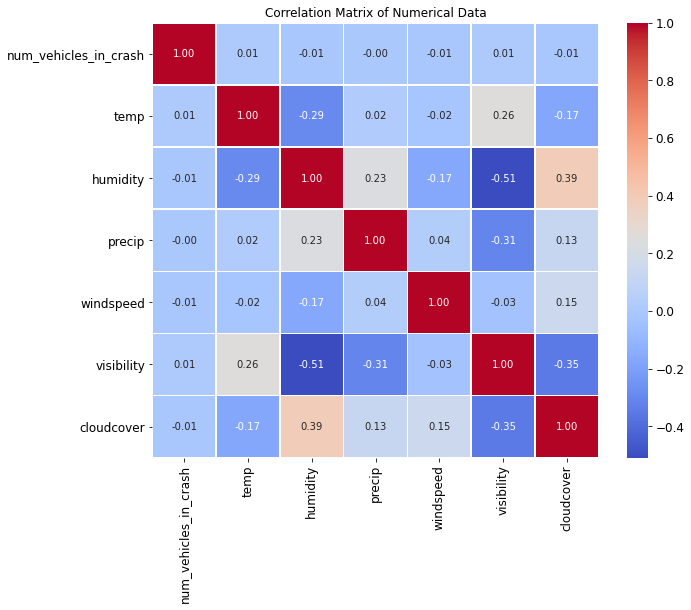

In [200]:
checker.visualize_correlation()

In [201]:
temp_data = data.copy()

# **1. At what time of day are crashes most frequent?**

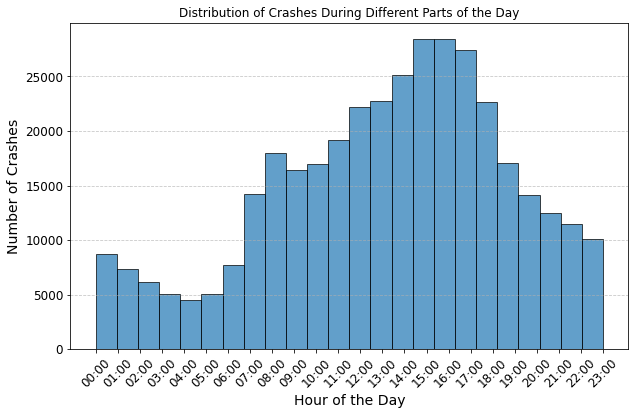

In [135]:
# Plot crash time distribution
ts_analysis.plot_crash_time_distribution()

Peak Hours: The highest number of crashes occurs between approximately 14:00 and 17:00 (2:00 PM to 5:00 PM). This time frame experiences the most frequent accidents during the day.

In [202]:
# Plot total killed and injured by hour
ts_analysis.plot_total_killed_and_injured_by_hour()

TypeError: '>=' not supported between instances of 'str' and 'int'

Although crash and injury rates peak at 2:00 PM and 5:00 PM, likely because of the afternoon commute and increased traffic, it's significant to note that nighttime hours, despite having lighter traffic, may have a higher risk of severe accidents.

In [ ]:
# Calculate crash severity
updated_data = eda.calculate_crash_severity(temp_data)

# **2. Which locations experience the highest number of crashes?**

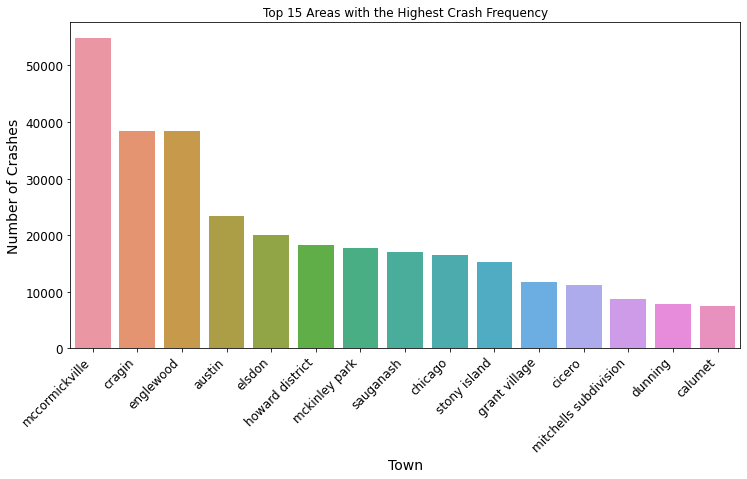

In [150]:
# Plot top towns with the highest crash frequency
crash_analysis.plot_top_towns()


In [ ]:
# Create a map
mymap_2 = eda.create_map()

# Display the map (Jupyter Notebook environment)
mymap_2

# **3. How do different weather conditions affect the frequency of crashes?**

In [ ]:
# Plot distribution of weather conditions in weather-related crashes
crash_analysis.plot_weather_conditions_distribution()

In [ ]:
# Plot crash severity by conditions
crash_analysis.plot_crash_severity_by_conditions()

In [ ]:
# Plot weather conditions vs total crashes
crash_analysis.plot_weather_conditions_vs_crashes()

Road accidents occur most frequently under the following conditions

Humidity: 55 - 70

Windspeed: 5.5-12.5

Visibility: 10

Cloud Cover: 100

Snow Depth: 0 - 0.1

Precipation: 0.0 - 0.1

# **4. During which months or seasons do crashes occur most frequently?**

In [ ]:
# Plot crash count by month and year
crash_season_analysis.plot_crash_count_by_month_and_year()

**Seasonal Trends:**
Generally, there are more crashes in the middle of the year (around June to October) across all years presented.
This pattern suggests that certain months experience higher traffic or risk factors.

**Yearly Variation:**
In 2020, there’s a noticeable decrease in crash counts compared to other years. This could be due to reduced travel during the COVID-19 pandemic.
The crash counts in 2021 and 2022 seem to follow a similar pattern.

In [ ]:
pivot_data


In [ ]:
# Get crash type summary
crash_type_summary_table = crash_season_analysis.get_crash_type_summary()

In [ ]:
# Plot temperature vs injuries and deaths
crash_season_analysis.plot_temperature_vs_injuries_and_deaths()

# **5. What are the primary contributory causes of crashes?**

In [ ]:
# Plot top contributory causes of crashes
crash_analysis.plot_top_contributory_causes()

In [ ]:
# Plot temperature vs injuries and deaths
crash_season_analysis.plot_temperature_vs_injuries_and_deaths()

# **6. How are crashes distributed across the days of the week, and which day experiences the most crashes?**

In [ ]:
# Plot crashes by day of the week
ts_analysis.plot_crashes_by_day_of_week()

Friday has the highest overall number of crashes

In [ ]:
# Plot fatal and incapacitating injuries by weekday
ts_analysis.plot_fatal_incapacitating_injuries_by_weekday()

Friday records the highest total number of crashes, whereas Saturday is distinguished by the highest incidence of fatal injuries.

# **7. Which types of crashes result in the highest fatalities?**

In [ ]:
crash_season_analysis.plot_most_fatal_crash_types()

# **8. Which contributory cause poses the greatest danger?*

In [ ]:
# Get contributory cause table
contributory_cause_table = crash_cause_analysis.get_contributory_cause_table()
contributory_cause_table

In [ ]:
# Plot average number of vehicles in crashes by contributory cause
crash_cause_analysis.plot_avg_vehicles_by_cause()

Most incidents involving vehicle damage typically coincide with instances where drivers are under the influence of alcohol or drugs, or when they exhibit reckless driving behavior.

In [ ]:
# Plot top conditions
crash_cause_analysis.plot_top_conditions()

 “Disregarding traffic signals” and “failing to reduce speed to avoid a crash” contribute significantly to fatalities.

“Physical condition of the driver” and “failing to yield right-of-way” are also among the top conditions.

“Disregarding road markings” has the highest death ratio, indicating that when this condition occurs, it often leads to fatalities.

Other high-risk conditions include “driving on the wrong side of the road,” “disregarding traffic signals,” and “operating the vehicle in an erratic, reckless, careless, negligent, or aggressive manner.”

In [ ]:
# Generate scatter plots
eda.scatter_plots(data)

In [ ]:
# Calculate crash severity
updated_data = eda.calculate_crash_severity(temp_data)

In [ ]:
temp_data.head()

In [ ]:
# Generate scatter plots with new severity hues (v2)
eda.scatter_plots_with_severity_v2(temp_data)

# **9. Does the presence of traffic control measures reduce the likelihood of crashes?**

In [ ]:
# Get traffic control device table
traffic_control_device_table_sorted = crash_cause_analysis.get_traffic_control_device_table()
traffic_control_device_table_sorted


<class 'pandas.core.frame.DataFrame'>
Int64Index: 371997 entries, 0 to 372061
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   crash_date                        371997 non-null  object  
 1   crash_time                        371997 non-null  object  
 2   town                              371997 non-null  object  
 3   total_injured                     371997 non-null  int64   
 4   total_killed                      371997 non-null  int64   
 5   injury_incapacitated              371997 non-null  int64   
 6   most_severe_injury                371997 non-null  object  
 7   crash_type                        371997 non-null  object  
 8   contributory_cause                371997 non-null  object  
 9   sec_contributory_cause            371997 non-null  object  
 10  num_vehicles_in_crash             371997 non-null  int64   
 11  crash_hit_and_run                 37199

In [ ]:
df_2.info()

In [ ]:
data["most_severe_injury"].value_counts()

In [ ]:
data.info()

In [ ]:
df_3.info()

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371997 entries, 0 to 372061
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   crash_date                        371997 non-null  object  
 1   crash_time                        371997 non-null  object  
 2   town                              371997 non-null  object  
 3   total_injured                     371997 non-null  int64   
 4   total_killed                      371997 non-null  int64   
 5   injury_incapacitated              371997 non-null  int64   
 6   most_severe_injury                371997 non-null  object  
 7   crash_type                        371997 non-null  object  
 8   contributory_cause                371997 non-null  object  
 9   sec_contributory_cause            371997 non-null  object  
 10  num_vehicles_in_crash             371997 non-null  int64   
 11  crash_hit_and_run                 37199

# Predictive Modeling

## TARGET: Severity of Crash

### BINARY:
- **Class 0**: No Injury
- **Class 1**: Injury

### TERNARY
- **Class 0**: No Injury
- **Class 1**: NON-INCAPACITATING injuries
- **Class 2**: INCAPACITATING or FATAL injuries

---

Now, it's time to start modeling! As stated at the beginning, the target we decided had the most real-world value was injury.

In terms of our data, we used the `MOST_SEVERE_INJURY` column in the Crashes dataset to represent the target.

However, using Injury as a target proved to have a major problem: severe class imbalance.

Bearing this in mind, we explored both binary and ternary classification models to see which one could best explain this data.



**1st Priority Metric: RECAL**L

I focused first and foremost on improving RECALL, since the most damaging false predictions would be false negatives (predicting no injury, when there was actually injury).


**First Simple Model: BINARY Classification**


Average Recall: 0.989380888056379
Average Precision: 1.0
Average Accuracy: 0.9984173227325801
Average ROC AUC: 0.9946904440281896


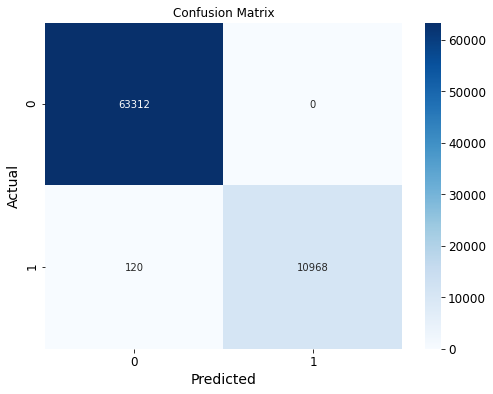

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63312
           1       1.00      0.99      0.99     11088

    accuracy                           1.00     74400
   macro avg       1.00      0.99      1.00     74400
weighted avg       1.00      1.00      1.00     74400



In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Make a copy of the original data
data_copy = data.copy()

# Preprocess the data
# Drop unnecessary columns from the copy
data_copy = data_copy.drop(['crash_date', 'crash_time'], axis=1)

# Create binary target variable
data_copy['injury'] = data_copy['most_severe_injury'].apply(lambda x: 0 if x == 'no indication of injury' else 1)

# Drop original target column
data_copy = data_copy.drop('most_severe_injury', axis=1)

# Split the data into features and target
X = data_copy.drop('injury', axis=1)
y = data_copy['injury']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=100000, C=0.05))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5)
recall_scores = []
precision_scores = []
accuracy_scores = []
roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_val_fold)
    
    recall_scores.append(recall_score(y_val_fold, y_pred))
    precision_scores.append(precision_score(y_val_fold, y_pred))
    accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
    roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred))

# Print average scores
print(f"Average Recall: {np.mean(recall_scores)}")
print(f"Average Precision: {np.mean(precision_scores)}")
print(f"Average Accuracy: {np.mean(accuracy_scores)}")
print(f"Average ROC AUC: {np.mean(roc_auc_scores)}")

# Final evaluation on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('Classification Report:')
print(class_report)


**False Negatives (FN):** The bottom-left cell indicates that there were 120 instances where Class 1 (‘Injury’) was incorrectly predicted as Class 0 (‘No Injury’)

Average Recall: 0.9891328838746828
Average Precision: 0.99417665340202
Average Accuracy: 0.9975167764039206
Average ROC AUC: 0.9940590241528955


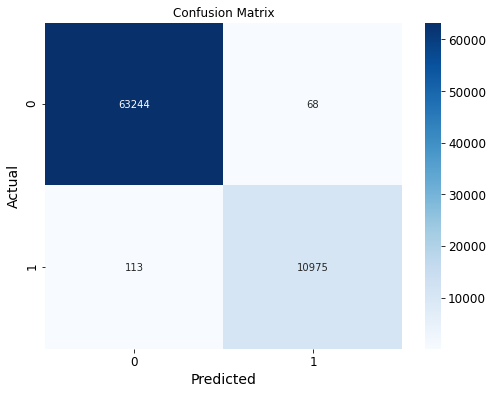

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63312
           1       0.99      0.99      0.99     11088

    accuracy                           1.00     74400
   macro avg       1.00      0.99      1.00     74400
weighted avg       1.00      1.00      1.00     74400



In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is already loaded into the variable `data`
# Make a copy of the original data
data_copy = data.copy()

# Preprocess the data
# Drop unnecessary columns from the copy
data_copy = data_copy.drop(['crash_date', 'crash_time'], axis=1)

# Create binary target variable
data_copy['injury'] = data_copy['most_severe_injury'].apply(lambda x: 0 if x == 'no indication of injury' else 1)

# Drop original target column
data_copy = data_copy.drop('most_severe_injury', axis=1)

# Split the data into features and target
X = data_copy.drop('injury', axis=1)
y = data_copy['injury']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model with SMOTE
model = ImbPipeline(steps=[('preprocessor', preprocessor),
                           ('smote', SMOTE(random_state=42)),
                           ('classifier', LogisticRegression(max_iter=100000, C=0.05))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5)
recall_scores = []
precision_scores = []
accuracy_scores = []
roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_val_fold)
    
    recall_scores.append(recall_score(y_val_fold, y_pred))
    precision_scores.append(precision_score(y_val_fold, y_pred))
    accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
    roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred))

# Print average scores
print(f"Average Recall: {np.mean(recall_scores)}")
print(f"Average Precision: {np.mean(precision_scores)}")
print(f"Average Accuracy: {np.mean(accuracy_scores)}")
print(f"Average ROC AUC: {np.mean(roc_auc_scores)}")

# Final evaluation on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('Classification Report:')
print(class_report)


Simple Logistic Regression Model without SMOTE:
Average Recall: 0.9990311928036479
Average Precision: 0.9998501791089577
Average Accuracy: 0.9999427413235237
Average ROC AUC: 1.0


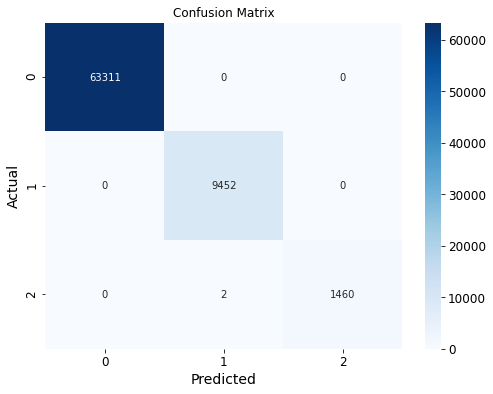

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63311
           1       1.00      1.00      1.00      9452
           2       1.00      1.00      1.00      1462

    accuracy                           1.00     74225
   macro avg       1.00      1.00      1.00     74225
weighted avg       1.00      1.00      1.00     74225

Logistic Regression Model with SMOTE:
Average Recall: 1.0
Average Precision: 1.0
Average Accuracy: 1.0
Average ROC AUC: 1.0


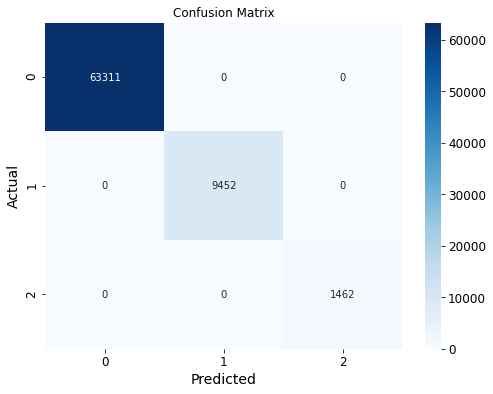

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63311
           1       1.00      1.00      1.00      9452
           2       1.00      1.00      1.00      1462

    accuracy                           1.00     74225
   macro avg       1.00      1.00      1.00     74225
weighted avg       1.00      1.00      1.00     74225



In [156]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(data, target_col='most_severe_injury'):
    # Make a copy of the original data
    data_copy = data.copy()

    # Drop unnecessary columns
    data_copy = data_copy.drop(['crash_date', 'crash_time'], axis=1)

    # Create ternary target variable
    def injury_category(injury):
        if injury == 'no indication of injury':
            return 0
        elif injury in ['nonincapacitating injury', 'reported, not evident']:
            return 1
        elif injury in ['incapacitating injury', 'fatal']:
            return 2
        else:
            return 3  # unknown or other categories

    data_copy['injury'] = data_copy[target_col].apply(injury_category)

    # Drop original target column and rows with unknown injury
    data_copy = data_copy[data_copy['injury'] != 3]
    data_copy = data_copy.drop(target_col, axis=1)

    # Split the data into features and target
    X = data_copy.drop('injury', axis=1)
    y = data_copy['injury']

    return X, y

def define_model(use_smote=False):
    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Preprocessing pipelines for both numeric and categorical data
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)])

    # Define the model
    if use_smote:
        model = ImbPipeline(steps=[('preprocessor', preprocessor),
                                   ('smote', SMOTE(random_state=42)),
                                   ('classifier', LogisticRegression(max_iter=100000, C=0.05))])
    else:
        model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(max_iter=100000, C=0.05))])

    return model

def evaluate_model(model, X_train, y_train, X_test, y_test, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits)
    recall_scores = []
    precision_scores = []
    accuracy_scores = []
    roc_auc_scores = []

    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        recall_scores.append(recall_score(y_val_fold, y_pred, average='macro'))
        precision_scores.append(precision_score(y_val_fold, y_pred, average='macro'))
        accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
        roc_auc_scores.append(roc_auc_score(y_val_fold, model.predict_proba(X_val_fold), multi_class='ovr'))

    # Print average scores
    print(f"Average Recall: {np.mean(recall_scores)}")
    print(f"Average Precision: {np.mean(precision_scores)}")
    print(f"Average Accuracy: {np.mean(accuracy_scores)}")
    print(f"Average ROC AUC: {np.mean(roc_auc_scores)}")

    # Final evaluation on the test set
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    # Confusion Matrix and Classification Report
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print('Classification Report:')
    print(class_report)

# Assuming the dataset is already loaded into the variable `data`
X, y = preprocess_data(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# First simple model without SMOTE
print("Simple Logistic Regression Model without SMOTE:")
simple_model = define_model(use_smote=False)
evaluate_model(simple_model, X_train, y_train, X_test, y_test)

# Logistic Regression with SMOTE
print("Logistic Regression Model with SMOTE:")
smote_model = define_model(use_smote=True)
evaluate_model(smote_model, X_train, y_train, X_test, y_test)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

def preprocess_data(data, target_col='most_severe_injury'):
    # Make a copy of the original data
    data_copy = data.copy()

    # Drop unnecessary columns
    data_copy = data_copy.drop(['crash_date', 'crash_time'], axis=1)

    # Create ternary target variable
    def injury_category(injury):
        if injury == 'no indication of injury':
            return 0
        elif injury in ['nonincapacitating injury', 'reported, not evident']:
            return 1
        elif injury in ['incapacitating injury', 'fatal']:
            return 2
        else:
            return 3  # unknown or other categories

    data_copy['injury'] = data_copy[target_col].apply(injury_category)

    # Drop original target column and rows with unknown injury
    data_copy = data_copy[data_copy['injury'] != 3]
    data_copy = data_copy.drop(target_col, axis=1)

    # Split the data into features and target
    X = data_copy.drop('injury', axis=1)
    y = data_copy['injury']

    return X, y

def define_model(model_type='logistic', use_smote=False):
    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Preprocessing pipelines for both numeric and categorical data
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)])

    # Define the model
    if model_type == 'logistic':
        classifier = LogisticRegression(max_iter=100000, C=0.05)
    elif model_type == 'xgboost':
        classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    elif model_type == 'random_forest':
        classifier = RandomForestClassifier(n_estimators=100)

    if use_smote:
        model = ImbPipeline(steps=[('preprocessor', preprocessor),
                                   ('smote', SMOTE(random_state=42)),
                                   ('classifier', classifier)])
    else:
        model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', classifier)])

    return model

def evaluate_model(model, X_train, y_train, X_test, y_test, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits)
    recall_scores = []
    precision_scores = []
    accuracy_scores = []
    roc_auc_scores = []

    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        recall_scores.append(recall_score(y_val_fold, y_pred, average='macro'))
        precision_scores.append(precision_score(y_val_fold, y_pred, average='macro'))
        accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
        roc_auc_scores.append(roc_auc_score(y_val_fold, model.predict_proba(X_val_fold), multi_class='ovr'))

    # Print average scores
    print(f"Average Recall: {np.mean(recall_scores)}")
    print(f"Average Precision: {np.mean(precision_scores)}")
    print(f"Average Accuracy: {np.mean(accuracy_scores)}")
    print(f"Average ROC AUC: {np.mean(roc_auc_scores)}")

    # Final evaluation on the test set
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    # Confusion Matrix and Classification Report
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print('Classification Report:')
    print(class_report)

    return model

# Assuming the dataset is already loaded into the variable `data`
X, y = preprocess_data(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Logistic Regression with SMOTE
print("Logistic Regression Model with SMOTE:")
logistic_smote_model = define_model(model_type='logistic', use_smote=True)
evaluate_model(logistic_smote_model, X_train, y_train, X_test, y_test)

# XGBoost with SMOTE
print("XGBoost Model with SMOTE:")
xgboost_smote_model = define_model(model_type='xgboost', use_smote=True)
evaluate_model(xgboost_smote_model, X_train, y_train, X_test, y_test)

# Random Forest with SMOTE
print("Random Forest Model with SMOTE:")
random_forest_smote_model = define_model(model_type='random_forest', use_smote=True)
evaluate_model(random_forest_smote_model, X_train, y_train, X_test, y_test)


Logistic Regression Model with SMOTE:


In [ ]:
data_copy.info()